# Swiss roll data generation with DDPM

The objective of this exercise is to build a generative model from some representative examples of the distribution. We will place ourselves in the case of 2D data (2 dimensional vectors) which follow a Swiss Roll type distribution and will use Denoising Diffusion Probabilistic Models. 

The reference article on the method used is : Denoising Diffusion Probabilistic Models, Jonathan Ho, Ajay Jain, Pieter Abbeel,   arXiv:2006.11239v2
https://doi.org/10.48550/arXiv.2006.11239. PDF available at : https://arxiv.org/abs/2006.11239 

Let's start by importing the different modules needed.

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline 
import torch.optim as optim

We will generate the data using the Scikit-Learn library's Swiss Roll data generator and then create a PyTorch dataset to use them subsequently.

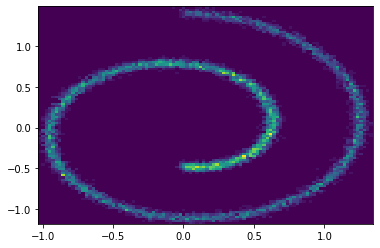

In [ ]:
import sklearn.datasets
srx,sry = sklearn.datasets.make_swiss_roll(n_samples=10000, noise=0.3, random_state=None)
srx=torch.tensor(srx,dtype=torch.float)
x_train = torch.cat((srx[:,0].reshape(-1,1),srx[:,2].reshape(-1,1)),1)/10
plt.hist2d(x_train[:,0].numpy(),x_train[:,1].numpy(),bins=100)


class my_dataset(Dataset):
    def __init__(self,x):
      self.x=x 
    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx]
x_train_dataset = my_dataset(x_train)
h=2


In the following code cell, we will define the different parameters useful for generating increasingly noisy data sequences. You can refer back to the course or article to list these parameters, but it is about defining T which is the number of time steps and alpha which is the noise level between two time steps. You will plot the curve that shows the evolution of alpha and the cumulative product of alphas over time.

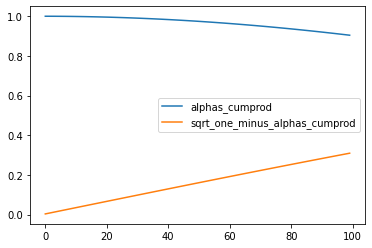

In [ ]:
# definition of the timesteps, betas, alphas, etc.

T = ... 

alphas =  ... 



We will now take the riginal training data (data that is not noisy) and apply the noise model to them. Plot the data in 2D every 10 time steps. At the last time step, these data should no longer be distinguishable from 2D Gaussian noise.

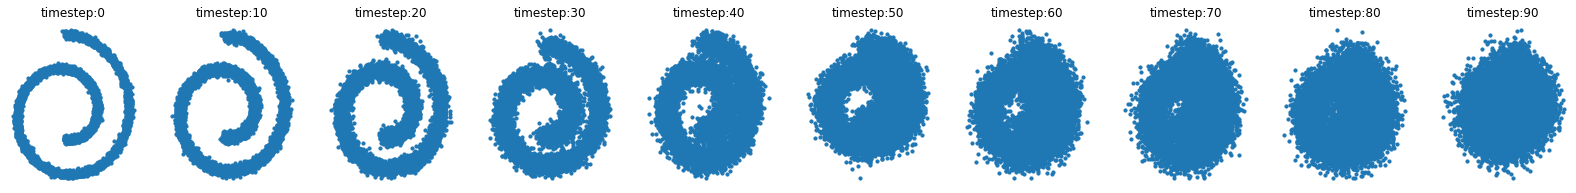

In [ ]:
# visualisation of the forward diffusion process 


def forward(x_0, t, noise=None):
    ...
    ...
    ....

def plot_diffusion():
    fig, axs = plt.subplots(1, 10, figsize=(28, 3))
    for i in range(10):
        q_i = forward(x_train, torch.tensor([i * 10]))
        axs[i].scatter(q_i[:, 0], q_i[:, 1], s=10);
        axs[i].set_axis_off(); axs[i].set_title('timestep:'+str(i*10))
plot_diffusion()

Let's define a simple neural network for denoising the data.

In [ ]:
# definition of the denoising network

class denoisingNet(torch.nn.Module):
    def __init__(self,h,d):
        super().__init__()
            ...
            ...
            
    def forward(self, x, t):
            ...
            ...

  

And now train the denoising model.

In [ ]:
...

for t in range(1001):
    for index, x in enumerate(loader):
        ...
        ...


epoch: 0 loss: tensor(0.7282, grad_fn=<MeanBackward0>)
epoch: 200 loss: tensor(0.6741, grad_fn=<MeanBackward0>)
epoch: 400 loss: tensor(0.6552, grad_fn=<MeanBackward0>)
epoch: 600 loss: tensor(0.6864, grad_fn=<MeanBackward0>)
epoch: 800 loss: tensor(0.6217, grad_fn=<MeanBackward0>)
epoch: 1000 loss: tensor(0.6963, grad_fn=<MeanBackward0>)


Once the model is trained, you can use it to denoise gaussian noise, and generate data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


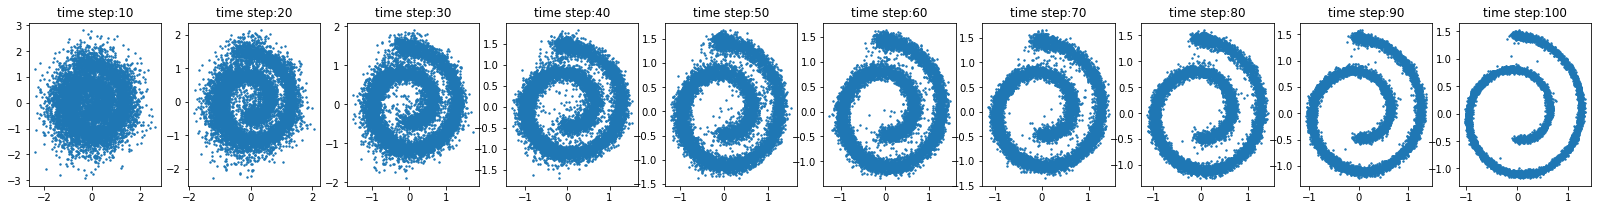

In [ ]:
# applying the backward model for denoising normal noise

def denoise(model, shape):
        ...
        ...
        
        
        
x_seq = denoise(model, x_train.shape)
fig, axs = plt.subplots(1, 10, figsize=(28, 3))
for i in range(1, 11):
            cur_x = x_seq[i * 10].detach()
            axs[i-1].scatter(cur_x[:, 0], cur_x[:, 1], s=2);
            axs[i-1].set_title('time step:'+ str(i*10))

---

# The following questions are not to be addressed during this session, but should be done individually during your personal working time. 

# The entire work (including what came before) should be submitted to your TA who will specify the terms and deadlines. 

# The entire work will be graded. 

---


You are now being asked to create an image generator that generates images of digits resembling the images in the MNIST dataset, using Gaussian noise as the input. You may use MNIST images as the training data.

The main difficulty compared to the previous exercise is that the data is in a much larger representation space.

To solve this task, several options are possible.

One possible choice is to start by reducing the dimensionality, for example, by starting with learning an autoencoder that allows you to represent the images in a low-dimensional latent space.

The DDPM process will then be done in the low-dimensional space, and the transition to images will be done by applying the decoder of the autoencoder.

However, it is possible to proceed differently and you are free to proceed as you wish.